# Predict the employee attrition rate in organizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import preprocessing


In [2]:
df = pd.read_csv("Dataset/Train.csv")

In [3]:
df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [4]:
df.shape

(7000, 24)

In [5]:
df.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


## **Feature Engineering

In [6]:
# df.Decision_skill_possess.value_counts()

In [7]:
def convert_gender(data):
    if data['Gender'] == 'F':
        return 1
    return 0

df['Gender'] = df.apply(convert_gender, axis=1)

In [8]:
def convert_relationship_status(data):
    if data['Relationship_Status'] == 'Married':
        return 1
    return 0

df['Relationship_Status'] = df.apply(convert_relationship_status, axis=1)

In [9]:
def generate_VAR23(data):
    return data['VAR2'] * data['VAR3']

df['VAR23'] = df.apply(generate_VAR23, axis=1)

In [10]:
def generate_age_growthRate(data):
    return data['Age'] * data['growth_rate']

df['AGE_GROWTH'] = df.apply(generate_age_growthRate, axis=1)

In [11]:
def generate_age_var23(data):
    return data['VAR23'] * data['Age']

df['AGE_VAR23'] = df.apply(generate_age_var23, axis=1)

In [12]:
def generate_Time_of_service_var23(data):
    return data['VAR23'] * data['Time_of_service']

df['TIME_OF_SERVICE_VAR23'] = df.apply(generate_Time_of_service_var23, axis=1)

In [13]:
def generate_growth_rate_var23(data):
    return data['VAR23'] * data['growth_rate']

df['GROWTH_RATE_VAR23'] = df.apply(generate_growth_rate_var23, axis=1)

In [14]:
def generate_age_var4567(data):
    return data['VAR4'] * data['VAR5'] * data['VAR6'] * data['VAR7']

df['VAR4567'] = df.apply(generate_age_var4567, axis=1)

In [15]:
def generate_age_time_of_service(data):
    return data['Age'] * data['Time_of_service']

df['AGE_TIME_OF_SERVICE'] = df.apply(generate_age_time_of_service, axis=1)

In [16]:
# def generate_new(data):
#     return data['Age'] * data['VAR23']

# df['new'] = df.apply(generate_new, axis=1)

# plt.scatter(df.Age, df.new)
# plt.show()

In [17]:
# import seaborn as sns
# # Create the default pairplot
# my_plt = sns.pairplot(df)
# my_plt.savefig("output.png")

In [18]:
# df.AGE_GROWTH = np.log1p(df.AGE_GROWTH) 

In [19]:
# df.Time_of_service = np.log1p(df.Time_of_service) 

In [20]:
# df.corr()
# f, ax = plt.subplots(figsize=(16, 16))
# sns.heatmap(df.corr(), annot=True, linewidths=0.5, square=True, vmax=0.3, center=0, cmap=sns.cubehelix_palette())

In [21]:
# df.head().T

<hr><hr>

## **Filling missing values

In [22]:
# df = df.dropna()

In [23]:
def check_missing_values(df):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    print(missing)
    missing.sort_values(inplace=True)
    try:
        missing.plot.bar()
    except:
        pass

Age                      412
Time_of_service          144
Pay_Scale                  9
Work_Life_balance         11
VAR2                     577
VAR4                     656
VAR23                    577
AGE_GROWTH               412
AGE_VAR23                952
TIME_OF_SERVICE_VAR23    706
GROWTH_RATE_VAR23        577
VAR4567                  656
AGE_TIME_OF_SERVICE      549
dtype: int64


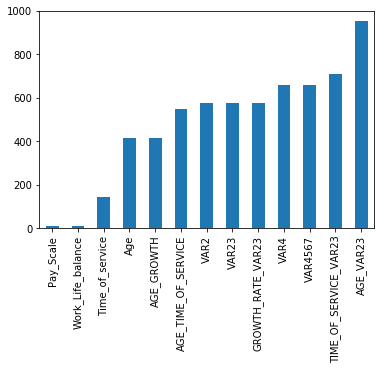

In [24]:
check_missing_values(df)

In [25]:
df = df.fillna(df.mean())

<hr><hr>

## Dealing with clean Data

In [26]:
clean_df = df.copy()

In [27]:
df_X = clean_df.drop(["Employee_ID", "Attrition_rate"], axis=1)
df_y = df.loc[:, "Attrition_rate"]
# print(df_X.info())
# df_X.shape

In [28]:
df_X = pd.get_dummies(df_X,drop_first=False)
df_X.shape

(7000, 51)

### Standardization

In [29]:
# scaler = MinMaxScaler()
# df_X_scaled = scaler.fit_transform(df_X)
# print(df_X_scaled)

In [30]:
# scaler = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)
# df_X_scaled = scaler.fit_transform(df_X)
# print(df_X_scaled)

In [31]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_X_scaled = scaler.fit_transform(df_X)
print(df_X_scaled)

[[ 0.          0.10335656  1.         ...  0.          0.
   0.        ]
 [-1.         -0.67925213  0.         ...  0.          0.
   0.        ]
 [ 0.          0.79900874  0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.40770439  0.         ...  0.          0.
   0.        ]
 [ 0.          0.32074787  0.         ... -1.          0.
   0.        ]
 [ 0.          0.79900874  0.         ...  0.          0.
   0.        ]]


In [32]:
X_train, X_test, y_train, y_test = train_test_split(df_X_scaled, df_y, test_size=0.22, random_state=42)

In [33]:
from sklearn import metrics as skmetrics

def calculate_regression_metrics(y_test, predictions):
    mean_squared_error = skmetrics.mean_squared_error(y_test, predictions)
    mean_absolute_error = skmetrics.mean_absolute_error(y_test, predictions)
    r2_error = skmetrics.r2_score(y_test, predictions)
    result = {'mean_squared_error': mean_squared_error, 'mean_absolute_error': mean_absolute_error, 'r2_score': r2_error}
    return result 

In [34]:
!pip install --upgrade --user scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\paras\anaconda3\lib\site-packages (0.23.1)


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor


# reg1 = GradientBoostingRegressor(random_state=1, n_estimators=10)
# reg2 = RandomForestRegressor(n_estimators=12, max_depth=9)
# reg3 = LinearRegression()
# reg4 = ElasticNet(normalize=True)
# reg5 = xgb.XGBRegressor()

# ensemble = VotingRegressor(estimators=[
#                                        ('gb', reg4), 
#                                        ('rf', reg2), 
#                                        ('lr', reg3), 
#                                        ('enet', reg1), 
#                                        ('xgbr', reg5)
#                                       ])
# ensemble.fit(X_train, y_train)

In [36]:
ensemble = ElasticNet(normalize=True)
ensemble.fit(X_train, y_train)

LinearRegression()

In [37]:
# from sklearn.linear_model import RidgeCV, LassoCV
# from sklearn.svm import SVR
# estimators = [('ridge', RidgeCV()),
#               ('lasso', LassoCV(random_state=42)),
#               ('svr', SVR(C=1, gamma=1e-6))]

# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import StackingRegressor
# ensemble = StackingRegressor(
#     estimators=estimators,
#     final_estimator=GradientBoostingRegressor(random_state=42))

# ensemble.fit(X_train, y_train)

In [38]:
pred = ensemble.predict(X_test)
pred = pred.reshape(-1, 1)

calculate_regression_metrics(y_test, pred)

{'mean_squared_error': 0.03509606185165778,
 'mean_absolute_error': 0.12689836049463843,
 'r2_score': -0.013201642790835688}

# Working on Test Dataset

In [39]:
df_test = pd.read_csv("Dataset/Test.csv")

In [40]:
df_test.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,...,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,...,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,...,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,...,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,...,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [41]:
df_test['Gender'] = df_test.apply(convert_gender, axis=1)
df_test['Relationship_Status'] = df_test.apply(convert_relationship_status, axis=1)
df_test['VAR23'] = df_test.apply(generate_VAR23, axis=1)
df_test['AGE_GROWTH'] = df_test.apply(generate_age_growthRate, axis=1)
df_test['AGE_VAR23'] = df_test.apply(generate_age_var23, axis=1)
df_test['TIME_OF_SERVICE_VAR23'] = df_test.apply(generate_Time_of_service_var23, axis=1)
df_test['GROWTH_RATE_VAR23'] = df_test.apply(generate_growth_rate_var23, axis=1)
df_test['VAR4567'] = df_test.apply(generate_age_var4567, axis=1)
df_test['AGE_TIME_OF_SERVICE'] = df_test.apply(generate_age_time_of_service, axis=1)

# df_test['AGE_VAR1'] = df_test.apply(generate_age_VAR1, axis=1)
# df_test['AGE_VAR2'] = df_test.apply(generate_age_VAR2, axis=1)
# df_test['AGE_VAR3'] = df_test.apply(generate_age_VAR3, axis=1)
# df_test['AGE_VAR4'] = df_test.apply(generate_age_VAR4, axis=1)
# df_test['AGE_VAR5'] = df_test.apply(generate_age_VAR5, axis=1)
# df_test['AGE_VAR6'] = df_test.apply(generate_age_VAR6, axis=1)
# df_test['AGE_VAR7'] = df_test.apply(generate_age_VAR7, axis=1)

In [42]:
df_test = df_test.fillna(df.mean())

In [43]:
check_missing_values(df_test)

Series([], dtype: int64)


In [44]:
df_test_X = df_test.drop(["Employee_ID"], axis=1)

In [45]:
df_test_X = pd.get_dummies(df_test_X,drop_first=False)

In [46]:
df_test_X.shape

(3000, 51)

In [47]:
# df_test_X.head().T

In [48]:
df_test_X = scaler.transform(df_test_X)

In [49]:
df_test_X.shape

(3000, 51)

In [50]:
predn = ensemble.predict(df_test_X)

In [51]:
submission = pd.DataFrame({
        "Employee_ID": df_test["Employee_ID"],
        "Attrition_rate": predn
    })

submission.to_csv('submission.csv', index=False)